# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [99]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import pandas as pd
# Packages for visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
import datetime
# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [42]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [43]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
print("Shape:")
print(df0.shape)
print("\nInfo:")
print(df0.info())

Shape:
(22699, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [44]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
print("Checking for NULL values:")
print(df0.isna().sum())
print("\nChecking for duplicates:")
print(df0.duplicated().sum())

Checking for NULL values:
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Checking for duplicates:
0


Use `.describe()`.

In [45]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [46]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [47]:
# Check the format of the data
### YOUR CODE HERE ###
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [48]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0["tpep_pickup_datetime"] = pd.to_datetime(df0["tpep_pickup_datetime"])
df0["tpep_dropoff_datetime"] = pd.to_datetime(df0["tpep_dropoff_datetime"])

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [49]:
# Create `duration` column
### YOUR CODE HERE ###
df0["duration"] = (df0["tpep_dropoff_datetime"] - df0["tpep_pickup_datetime"]).dt.total_seconds() / 60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [50]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

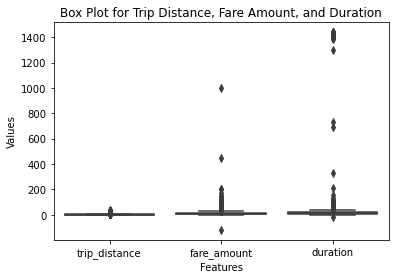

In [51]:
### YOUR CODE HERE ###
sns.boxplot(data=df0[["trip_distance", "fare_amount", "duration"]])

plt.title("Box Plot for Trip Distance, Fare Amount, and Duration")
plt.ylabel("Values")
plt.xlabel("Features")

plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

==> ENTER YOUR RESPONSE HERE <br>
**Answer 1**:
Based on the box plot, the duration variable appears to contain the most significant outliers. The whiskers extend quite far, and there are individual data points (represented by dots) that are significantly distant from the main body of the data. The fare_amount variable also shows some potential outliers, but to a lesser extent.

**Answer 2**:
The box plot indicates that the majority of trip distances are relatively short. If the dataset includes data from a specific region or city, it's possible that very long distances might be unusual.

**Answer 3**:
Distances, fares, and durations are typically measured in positive units. If negative values appear, it might be due to data entry errors or inconsistencies in the data collection process.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [52]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
sorted_trip_distances = df0["trip_distance"].sort_values()
least_10_values = sorted_trip_distances.head(10)
print(least_10_values)

22026    0.0
795      0.0
6908     0.0
13561    0.0
12238    0.0
6878     0.0
14372    0.0
20638    0.0
920      0.0
16263    0.0
Name: trip_distance, dtype: float64


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [53]:
### YOUR CODE HERE ###
df0[df0["trip_distance"] == 0.0].shape[0]

148

#### `fare_amount` outliers

In [54]:
### YOUR CODE HERE ###
sorted_fare_amount = df0["fare_amount"].sort_values()
least_10_values = sorted_fare_amount.head(10)
print(least_10_values)

12944   -120.0
11204     -4.5
20698     -4.5
14714     -4.0
17602     -4.0
5448      -3.5
20317     -3.5
8204      -3.5
18565     -3.0
4423      -3.0
Name: fare_amount, dtype: float64


**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [55]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0[df0["fare_amount"] < 0].shape[0]
df0.loc[df0["fare_amount"] < 0, "fare_amount"] = 0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [61]:
def impute_outliers(df, column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        df: The dataframe containing the data.
        column_list: A list of columns to iterate over.
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for column in column_list:
        # Reassign minimum to zero
        df[column] = df[column].clip(lower=0)  # Set any negative values to zero

        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper threshold
        upper_threshold = Q3 + (iqr_factor * IQR)

        # Reassign values > threshold to threshold
        df.loc[df[column] > upper_threshold, column] = upper_threshold

# Example usage
column_list = ["fare_amount"]
impute_outliers(df0, column_list, 6)

#### `duration` outliers


In [58]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0["duration"].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [59]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0["duration"] = df0["duration"].clip(lower=0)
negative_duration_count = df0[df0["duration"] < 0].shape[0]

In [63]:
# Impute the high outliers
### YOUR CODE HERE ###
def impute_high_outliers(df, column_list, iqr_factor):
    '''
    Impute high outliers in specified columns based on their interquartile range.

    Arguments:
        df: The dataframe containing the data.
        column_list: A list of columns to iterate over.
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.
    '''
    for column in column_list:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper threshold
        upper_threshold = Q3 + (iqr_factor * IQR)

        # Impute values > threshold with the threshold value
        df.loc[df[column] > upper_threshold, column] = upper_threshold

# Example usage
impute_high_outliers(df0, ["duration"], 6)  # Impute high outliers in the duration column

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [64]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0["pickup_dropoff"] = df0["tpep_pickup_datetime"].dt.strftime('%Y-%m-%d %H:%M:%S') + " to " + df0["tpep_dropoff_datetime"].dt.strftime('%Y-%m-%d %H:%M:%S')

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [65]:
### YOUR CODE HERE ###
grouped = df0.groupby("pickup_dropoff")["trip_distance"].mean().reset_index()

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [66]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.set_index("pickup_dropoff").to_dict()
# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict["trip_distance"]

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [67]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0["mean_distance"] = df0["pickup_dropoff"].copy()
# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0["mean_distance"] = df0["mean_distance"].map(grouped_dict)
# Confirm that it worked
### YOUR CODE HERE ###
print(df0[["pickup_dropoff", "mean_distance"]].head())

                               pickup_dropoff  mean_distance
0  2017-03-25 08:55:43 to 2017-03-25 09:09:47           3.34
1  2017-04-11 14:53:28 to 2017-04-11 15:19:58           1.80
2  2017-12-15 07:26:56 to 2017-12-15 07:34:08           1.00
3  2017-05-07 13:17:59 to 2017-05-07 13:48:14           3.70
4  2017-04-15 23:32:20 to 2017-04-15 23:49:03           4.37


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [68]:
### YOUR CODE HERE ###
df0["mean_duration"] = df0["pickup_dropoff"].copy()
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
mean_duration_grouped = df0.groupby("pickup_dropoff")["duration"].mean().to_dict()
df0["mean_duration"] = df0["mean_duration"].map(mean_duration_grouped)
# Confirm that it worked
### YOUR CODE HERE ###
print(df0[["pickup_dropoff", "mean_duration"]].head())

                               pickup_dropoff  mean_duration
0  2017-03-25 08:55:43 to 2017-03-25 09:09:47      14.066667
1  2017-04-11 14:53:28 to 2017-04-11 15:19:58      26.500000
2  2017-12-15 07:26:56 to 2017-12-15 07:34:08       7.200000
3  2017-05-07 13:17:59 to 2017-05-07 13:48:14      30.250000
4  2017-04-15 23:32:20 to 2017-04-15 23:49:03      16.716667


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [69]:
# Create 'day' col
### YOUR CODE HERE ###
df0["day"] = df0["tpep_pickup_datetime"].dt.day_name()
# Create 'month' col
### YOUR CODE HERE ###
df0["month"] = df0["tpep_pickup_datetime"].dt.month_name()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [71]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0["rush_hour"] = ((df0["day"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])) &
                     ((df0["tpep_pickup_datetime"].dt.time >= pd.to_datetime("06:00").time()) &
                      (df0["tpep_pickup_datetime"].dt.time <= pd.to_datetime("10:00").time())) |
                     ((df0["tpep_pickup_datetime"].dt.time >= pd.to_datetime("16:00").time()) &
                      (df0["tpep_pickup_datetime"].dt.time <= pd.to_datetime("20:00").time()))).astype(int)
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
df0.loc[df0["day"].isin(["Saturday", "Sunday"]), "rush_hour"] = 0

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

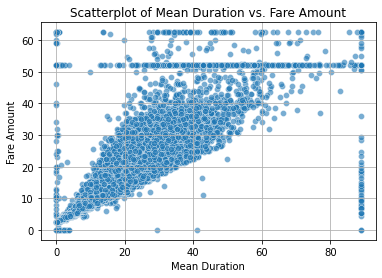

In [72]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.scatterplot(data=df0, x='mean_duration', y='fare_amount', alpha=0.6)
plt.title('Scatterplot of Mean Duration vs. Fare Amount')
plt.xlabel('Mean Duration')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [73]:
### YOUR CODE HERE ###
rides_around_52 = df0[df0['fare_amount'] == 52]
count_around_52 = rides_around_52.shape[0]

rides_around_63 = df0[df0['fare_amount'] == 63]
count_around_63 = rides_around_63.shape[0]

rides_around_62_50 = df0[df0['fare_amount'] == 62.50]
count_around_62_50 = rides_around_62_50.shape[0]

Examine the first 30 of these trips.

In [74]:
# Set pandas to display all columns
### YOUR CODE HERE ###
pd.set_option('display.max_columns', None)

trips_around_52 = rides_around_52.head(30)
print("First 30 trips with fare amount of $52:")
print(trips_around_52)

trips_around_63 = rides_around_63.head(30)
print("\nFirst 30 trips with fare amount of $63:")
print(trips_around_63)

trips_around_62_50 = rides_around_62_50.head(30)
print("\nFirst 30 trips with fare amount of $62.50:")
print(trips_around_62_50)

First 30 trips with fare amount of $52:
      Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11      18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
110     47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
161     95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
247    103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
379     80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388     16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406     55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
449     65900029         2  2017-08-03 22:47:14   2017-08-03 23:32:41   
468     80904240         2  2017-09-26 13:48:26   2017-09-26 14:31:17   
520     33706214         2  2017-04-23 21:34:48   2017-04-23 22:46:23   
569     99259872         2  2017-11-22 21:31:32   2017-11-22 22:00:25   
572     61050418         2  2017-07-18 13:29:06   2017-07-18 13:29:19   
586     544

**Question:** What do you notice about the first 30 trips?

==> ENTER YOUR RESPONSE HERE

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [91]:
### YOUR CODE HERE ###
columns_to_drop = [
    'Unnamed: 0',
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'store_and_fwd_flag',
    'pickup_dropoff',
    'RatecodeID',
    'day',
    'month'
]

# Drop the columns
df_cleaned = df0.drop(columns=columns_to_drop)

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

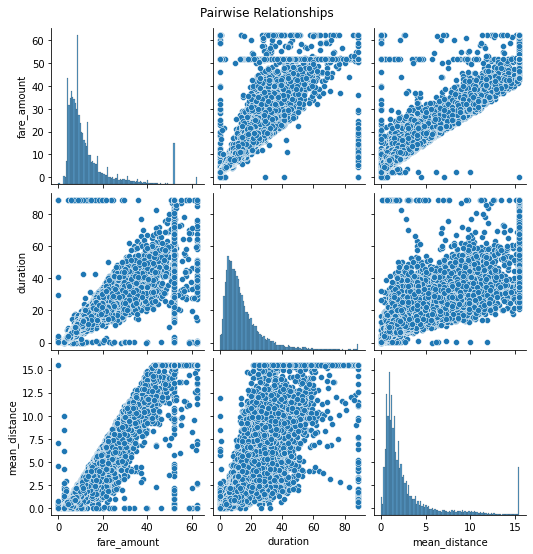

In [92]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
data = df_cleaned[['fare_amount', 'duration', 'mean_distance']]

# Create the pairplot
sns.pairplot(data)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

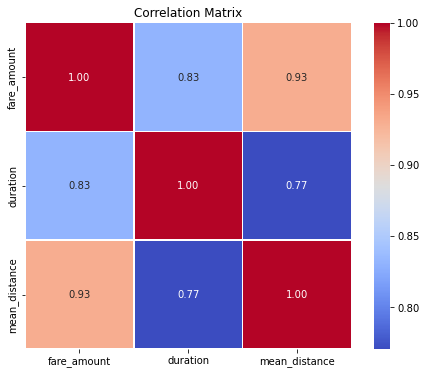

In [93]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Visualize a correlation heatmap of the data.

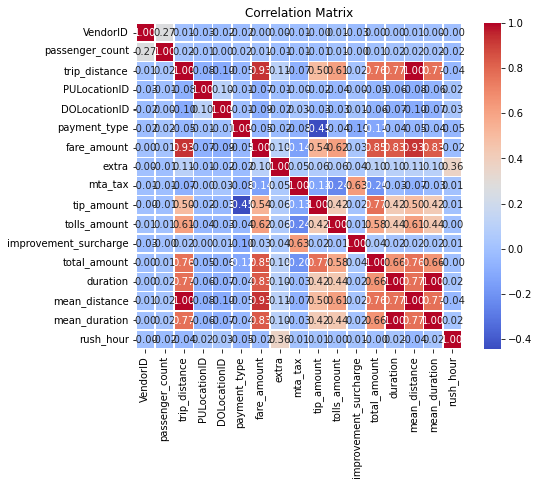

In [94]:
# Create correlation heatmap
### YOUR CODE HERE ###
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [95]:
### YOUR CODE HERE ###
X = df_cleaned.drop("fare_amount", axis=1)
y = df_cleaned["fare_amount"]

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

### Task 8b. Pre-process data


Dummy encode categorical variables

In [96]:
# Convert VendorID to string
### YOUR CODE HERE ###
X['VendorID'] = X['VendorID'].astype(str)
# Get dummies
### YOUR CODE HERE ###
vendor_dummies = pd.get_dummies(X['VendorID'], prefix='VendorID', drop_first=True)

X = pd.concat([X, vendor_dummies], axis=1)
X.drop('VendorID', axis=1, inplace=True)

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [97]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [106]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Fit the model

Instantiate your model and fit it to the training data.

In [107]:
# Fit your model to the training data
### YOUR CODE HERE ###
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [108]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
y_pred_train = lr.predict(X_train_scaled)
mse = mean_squared_error(y_pred_train, y_train)
rmse = mean_squared_error(y_pred_train, y_train, squared=False)
r2 = r2_score(y_pred_train, y_train)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 7.622433322469031
RMSE: 2.7608754630495436
R2: 0.9268227900999545


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [111]:
# Scale the X_test data
### YOUR CODE HERE ###
X_test_scaled = scaler.transform(X_test)

In [113]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
y_pred_test = lr.predict(X_test_scaled)
mse = mean_squared_error(y_pred_test, y_test)
rmse = mean_squared_error(y_pred_test, y_test, squared=False)
r2 = r2_score(y_pred_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 3.7876509916615992
RMSE: 1.9461888376161238
R2: 0.9625420541884409


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [115]:
# Create a `results` dataframe
### YOUR CODE HERE ###
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Residual': y_test - y_pred_test
})

results

,Actual,Predicted,Residual
5818,14.0,14.146110,-0.146110
18134,28.0,25.107322,2.892678
4655,5.5,6.019432,-0.519432
7378,15.5,16.482567,-0.982567
13914,9.5,10.100120,-0.600120
...,...,...,...
11108,21.5,20.847801,0.652199
7840,5.5,5.690086,-0.190086
8,9.0,8.598289,0.401711
16996,7.0,7.153221,-0.153221


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

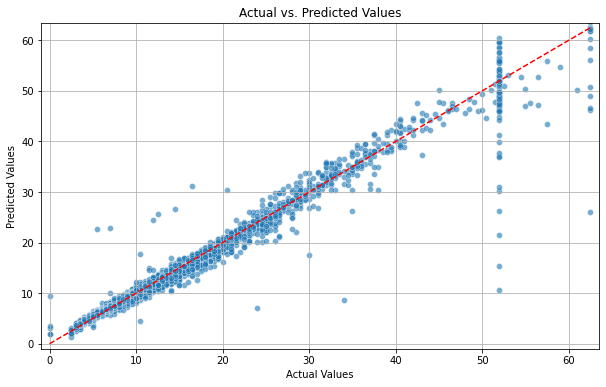

In [116]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, alpha=0.6)

plt.plot([results['Actual'].min(), results['Actual'].max()],
         [results['Actual'].min(), results['Actual'].max()], 
         color='red', linestyle='--')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(results['Actual'].min() - 1, results['Actual'].max() + 1)
plt.ylim(results['Actual'].min() - 1, results['Actual'].max() + 1)
plt.grid()

plt.show()

Visualize the distribution of the `residuals` using a histogram.

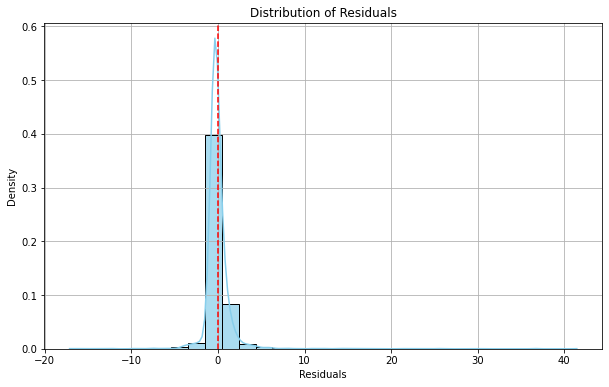

In [117]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
results['Residuals'] = results['Actual'] - results['Predicted']

plt.figure(figsize=(10, 6))
sns.histplot(results['Residuals'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.7)

plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid()

plt.show()

In [118]:
# Calculate residual mean
### YOUR CODE HERE ###
residual_mean = results['Residuals'].mean()
print("Mean of Residuals:", residual_mean)

Mean of Residuals: -0.014455927055898054


Create a scatterplot of `residuals` over `predicted`.

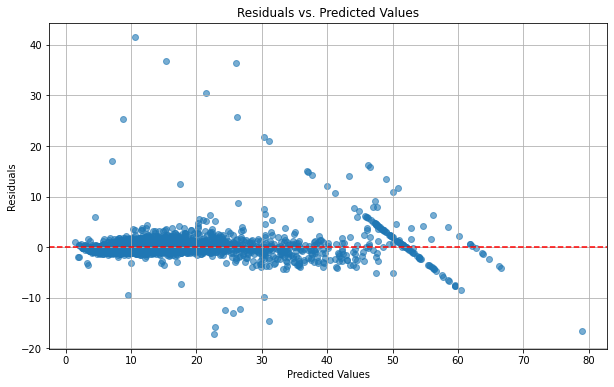

In [119]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
plt.figure(figsize=(10, 6))
plt.scatter(results['Predicted'], results['Residuals'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [120]:
# Output the model's coefficients
lr.coef_

array([-2.21436640e-02, -3.22527651e+12,  1.25389099e-02,  6.70623779e-03,
       -3.29162598e-01, -1.07940674e-01, -6.23580933e-01, -1.45094299e+00,
        3.00582886e-01,  3.60931396e-01,  3.90176392e+00, -8.13585598e+09,
        3.22527651e+12,  8.13585599e+09,  3.50952148e-03, -4.34570312e-02])

What do these coefficients mean? How should they be interpreted?

==> ENTER YOUR RESPONSE HERE <br> 
**Answer**: The coefficients indicate the change in the dependent variable (e.g., fare_amount) for a one-unit increase in each independent variable, with positive values showing an increase and negative values showing a decrease. Large coefficients may suggest stronger relationships, while values close to zero indicate minimal influence.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



==> ENTER YOUR RESPONSE HERE <br>
**Answer**:
The notebook effectively demonstrates data preprocessing, model training, and evaluation, providing visualizations of actual vs. predicted values and residuals to assess model performance. Key results include a correlation matrix and regression coefficients, which offer insights into variable relationships and their impact on the predicted outcome.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 